In [45]:
# %matplotlib widget

from __future__ import annotations

from collections import defaultdict
from dataclasses import dataclass, field
from itertools import product, combinations
from math import inf
from random import choice

import numpy as np

from numpy import int_, object_
from numpy.typing import NDArray

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from mpl_toolkits.mplot3d import axes3d

import re

from util import print_hex

COLORS = list(mcolors.CSS4_COLORS.keys())

<link href="style.css" rel="stylesheet"></link>
<main>
<article class="day-desc"><h2>--- Day 24: Never Tell Me The Odds ---</h2><p>It seems like something is going wrong with the snow-making process. Instead of forming snow, the water that's been absorbed into the air seems to be forming <a href="https://en.wikipedia.org/wiki/Hail" target="_blank">hail</a>!</p>
<p>Maybe there's something you can do to break up the hailstones?</p>
<p>Due to strong, probably-magical winds, the hailstones are all flying through the air in perfectly linear trajectories. You make a note of each hailstone's <em>position</em> and <em>velocity</em> (your puzzle input). For example:</p>
<pre><code>19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3
</code></pre>
<p>Each line of text corresponds to the position and velocity of a single hailstone. The positions indicate where the hailstones are <em>right now</em> (at time <code>0</code>). The velocities are constant and indicate exactly how far each hailstone will move in <em>one nanosecond</em>.</p>
<p>Each line of text uses the format <code>px py pz @ vx vy vz</code>. For instance, the hailstone specified by <code>20, 19, 15 @  1, -5, -3</code> has initial X position <code>20</code>, Y position <code>19</code>, Z position <code>15</code>, X velocity <code>1</code>, Y velocity <code>-5</code>, and Z velocity <code>-3</code>. After one nanosecond, the hailstone would be at <code>21, 14, 12</code>.</p>
<p>Perhaps you won't have to do anything. How likely are the hailstones to collide with each other and smash into tiny ice crystals?</p>
<p>To estimate this, consider only the X and Y axes; <em>ignore the Z axis</em>. Looking <em>forward in time</em>, how many of the hailstones' <em>paths</em> will intersect within a test area? (The hailstones themselves don't have to collide, just test for intersections between the paths they will trace.)</p>
<p>In this example, look for intersections that happen with an X and Y position each at least <code>7</code> and at most <code>27</code>; in your actual data, you'll need to check a much larger test area. Comparing all pairs of hailstones' future paths produces the following results:</p>
<pre><code>Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 18, 19, 22 @ -1, -1, -2
Hailstones' paths will cross <em>inside</em> the test area (at x=14.333, y=15.333).

Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 20, 25, 34 @ -2, -2, -4
Hailstones' paths will cross <em>inside</em> the test area (at x=11.667, y=16.667).

Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=6.2, y=19.4).

Hailstone A: 19, 13, 30 @ -2, 1, -2
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for hailstone A.

Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 20, 25, 34 @ -2, -2, -4
Hailstones' paths are parallel; they never intersect.

Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=-6, y=-5).

Hailstone A: 18, 19, 22 @ -1, -1, -2
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for both hailstones.

Hailstone A: 20, 25, 34 @ -2, -2, -4
Hailstone B: 12, 31, 28 @ -1, -2, -1
Hailstones' paths will cross outside the test area (at x=-2, y=3).

Hailstone A: 20, 25, 34 @ -2, -2, -4
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for hailstone B.

Hailstone A: 12, 31, 28 @ -1, -2, -1
Hailstone B: 20, 19, 15 @ 1, -5, -3
Hailstones' paths crossed in the past for both hailstones.
</code></pre>

<p>So, in this example, <code><em>2</em></code> hailstones' future paths cross inside the boundaries of the test area.</p>
<p>However, you'll need to search a much larger test area if you want to see if any hailstones might collide. Look for intersections that happen with an X and Y position each at least <code>200000000000000</code> and at most <code>400000000000000</code>. Disregard the Z axis entirely.</p>
<p>Considering only the X and Y axes, check all pairs of hailstones' future paths for intersections. <em>How many of these intersections occur within the test area?</em></p>
</article>

</main>


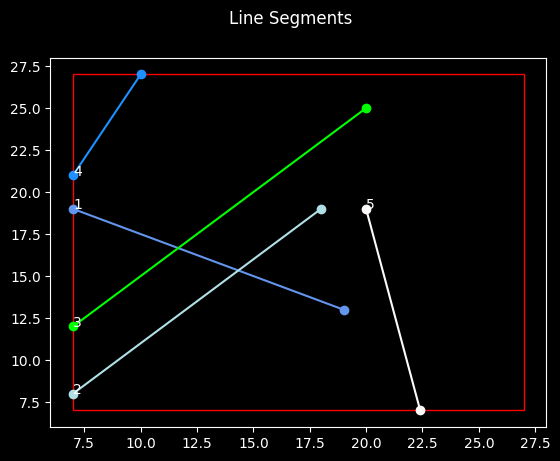

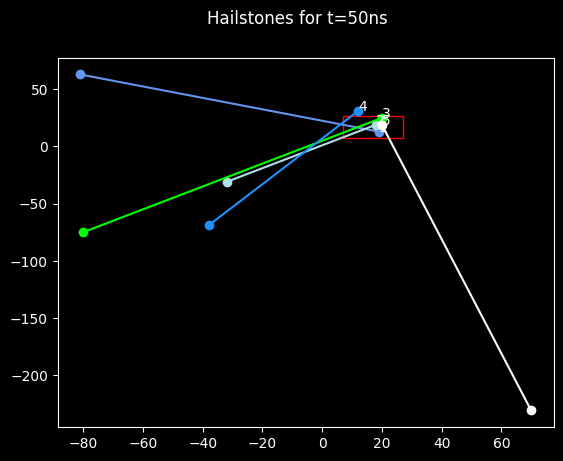

pl.intersections_bruteforce()=2


In [46]:
example = """
19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3
"""

DELTA = 1e-5


@dataclass(frozen=True, order=True, slots=True)
class LineSegment2D:
    x1: float
    y1: float
    x2: float
    y2: float
    i: int
    color: str

    def intersection(self, other: LineSegment2D) -> tuple[float, float] | None:
        b = (other.x2 - other.x1) * (self.y2 - self.y1)
        b -= (other.y2 - other.y1) * (self.x2 - self.x1)

        if b == 0:
            return None

        a = (other.x2 - other.x1) * (other.y1 - self.y1)
        a -= (other.y2 - other.y1) * (other.x1 - self.x1)

        c = (self.x2 - self.x1) * (other.y1 - self.y1)
        c -= (self.y2 - self.y1) * (other.x1 - self.x1)

        alpha = a / b
        beta = c / b

        if not (0 <= alpha <= 1 and 0 <= beta <= 1):
            return None

        return (
            self.x1 + alpha * (self.x2 - self.x1),
            self.y1 + alpha * (self.y2 - self.y1),
        )

    def plot(self, ax):
        ax.plot(
            [self.x1, self.x2],
            [self.y1, self.y2],
            color=self.color,
            marker="o",
        )
        ax.annotate(str(self.i), (self.x1, self.y1))


@dataclass(frozen=True, order=True, slots=True)
class HailStone:
    px: float
    py: float
    pz: float
    vx: float
    vy: float
    vz: float
    color: str = field(
        compare=False, repr=False, default_factory=lambda: choice(COLORS)
    )

    def linesegment2D(
        self, lowerbound: int, upperbound: int, i: int, vertical_sorted: bool = False
    ) -> LineSegment2D | None:
        points = []
        # y = py + t.vy
        # t = (y - py) / vy
        t = (lowerbound - self.py) / self.vy
        if t >= 0:
            x_for_y_lowerbound = self.px + t * self.vx
            if lowerbound <= x_for_y_lowerbound <= upperbound:
                points.append((x_for_y_lowerbound, lowerbound))

        t = (upperbound - self.py) / self.vy
        if t >= 0:
            x_for_y_upperbound = self.px + t * self.vx
            if lowerbound <= x_for_y_upperbound <= upperbound:
                points.append((x_for_y_upperbound, upperbound))
        # x = px + t.vx
        # t = (x - px) / vx
        t = (lowerbound - self.px) / self.vx
        if t >= 0:
            y_for_x_lowerbound = self.py + t * self.vy
            if lowerbound <= y_for_x_lowerbound <= upperbound:
                points.append((lowerbound, y_for_x_lowerbound))

        t = (upperbound - self.px) / self.vx
        if t >= 0:
            y_for_x_upperbound = self.py + t * self.vy
            if lowerbound <= y_for_x_upperbound <= upperbound:
                points.append((upperbound, y_for_x_upperbound))

        if lowerbound <= self.px <= upperbound and lowerbound <= self.py <= upperbound:
            points.append((self.px, self.py))

        if vertical_sorted:
            points.sort(key=lambda p: (-p[1], p))
        else:
            points.sort()

        if len(points) == 2:
            (x_from, y_from), (x_to, y_to) = points
            return LineSegment2D(x_from, y_from, x_to, y_to, i, self.color)

    def plot(self, ax, label: str, t: int = 10):
        ax.plot(
            [self.px, self.px + t * self.vx],
            [self.py, self.py + t * self.vy],
            color=self.color,
            marker="o",
        )
        ax.annotate(label, (self.px, self.py))


class Plotter:
    def __init__(
        self, s: str, lowerbound: int, upperbound: int, vertical_sorted: bool = False
    ) -> None:
        self.hailstones = self.parse(s)
        self.linesegments2D = [
            ls
            for i, hs in enumerate(self.hailstones, start=1)
            if (ls := hs.linesegment2D(lowerbound, upperbound, i, vertical_sorted))
            is not None
        ]
        self.lowerbound, self.upperbound = lowerbound, upperbound

    def intersections_bruteforce(self) -> int:
        return sum(
            1
            for ls1, ls2 in combinations(self.linesegments2D, 2)
            if ls1.intersection(ls2)
        )

    @classmethod
    def parse(cls, s: str) -> list[HailStone]:
        hailstones = []
        for line in s.strip().splitlines():
            pos, vel = re.split(r"\s*@\s*", line)
            px, py, pz = (int(i) for i in re.split(r"\s*,\s*", pos))
            vx, vy, vz = (int(i) for i in re.split(r"\s*,\s*", vel))
            hailstones.append(HailStone(px, py, pz, vx, vy, vz))
        return hailstones

    def plot_linesegments(self):
        fig, ax = plt.subplots()
        for ls in self.linesegments2D:
            ls.plot(ax)

        d = self.upperbound - self.lowerbound
        ax.add_patch(
            Rectangle(
                (self.lowerbound, self.lowerbound),
                d,
                d,
                edgecolor="red",
                facecolor="none",
            )
        )
        fig.suptitle("Line Segments")
        plt.show()

    def plot_hailstones(self):
        t = 50
        fig, ax = plt.subplots()
        for i, hs in enumerate(self.hailstones, start=1):
            hs.plot(ax, str(i), t)
        d = self.upperbound - self.lowerbound
        ax.add_patch(
            Rectangle(
                (self.lowerbound, self.lowerbound),
                d,
                d,
                edgecolor="red",
                facecolor="none",
            )
        )
        fig.suptitle(f"Hailstones for {t=}ns")
        plt.show()


pl = Plotter(example, 7, 27)
pl.plot_linesegments()
pl.plot_hailstones()
print(f"{pl.intersections_bruteforce()=}")

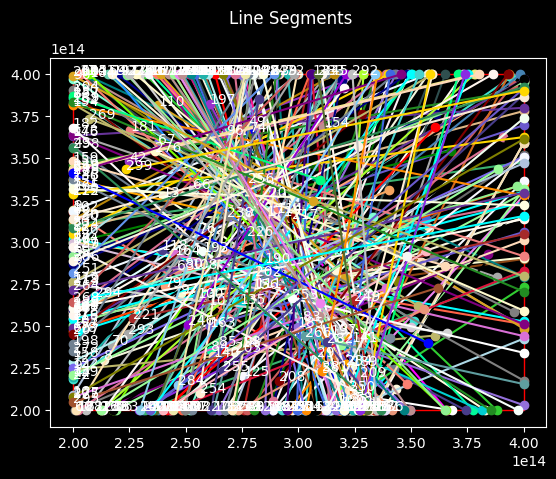

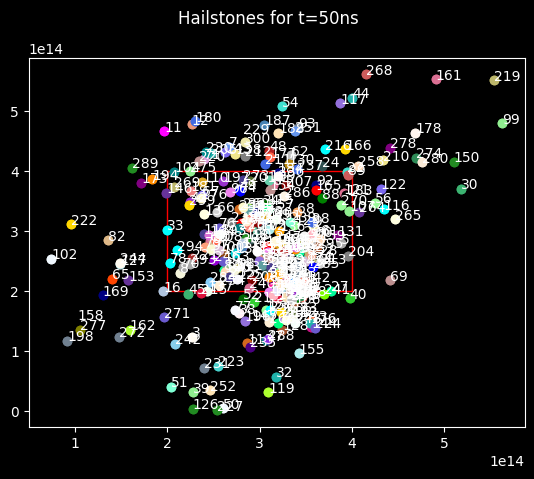

25810


In [47]:
with open("../input/day24.txt") as f:
    plf = Plotter(f.read(), 200_000_000_000_000, 400_000_000_000_000)
    plf.plot_linesegments()
    plf.plot_hailstones()
    print(f"{plf.intersections_bruteforce()}")

<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>25810</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>Upon further analysis, it doesn't seem like <em>any</em> hailstones will naturally collide. It's up to you to fix that!</p>
<p>You find a rock on the ground nearby. While it seems extremely unlikely, if you throw it just right, you should be able to <em>hit every hailstone in a single throw</em>!</p>
<p>You can use the probably-magical winds to reach <em>any integer position</em> you like and to propel the rock at <em>any integer velocity</em>. Now <em>including the Z axis</em> in your calculations, if you throw the rock at time <code>0</code>, where do you need to be so that the rock <em>perfectly collides with every hailstone</em>? Due to <span title="What, you've never studied probably-magical physics?">probably-magical inertia</span>, the rock won't slow down or change direction when it collides with a hailstone.</p>
<p>In the example above, you can achieve this by moving to position <code>24, 13, 10</code> and throwing the rock at velocity <code>-3, 1, 2</code>. If you do this, you will hit every hailstone as follows:</p>
<pre><code>Hailstone: 19, 13, 30 @ -2, 1, -2
Collision time: 5
Collision position: 9, 18, 20
<br/>
Hailstone: 18, 19, 22 @ -1, -1, -2
Collision time: 3
Collision position: 15, 16, 16
<br/>
Hailstone: 20, 25, 34 @ -2, -2, -4
Collision time: 4
Collision position: 12, 17, 18
<br/>
Hailstone: 12, 31, 28 @ -1, -2, -1
Collision time: 6
Collision position: 6, 19, 22
<br/>
Hailstone: 20, 19, 15 @ 1, -5, -3
Collision time: 1
Collision position: 21, 14, 12
</code></pre>

<p>Above, each hailstone is identified by its initial position and its velocity. Then, the time and position of that hailstone's collision with your rock are given.</p>
<p>After 1 nanosecond, the rock has <em>exactly the same position</em> as one of the hailstones, obliterating it into ice dust! Another hailstone is smashed to bits two nanoseconds after that. After a total of 6 nanoseconds, all of the hailstones have been destroyed.</p>
<p>So, at time <code>0</code>, the rock needs to be at X position <code>24</code>, Y position <code>13</code>, and Z position <code>10</code>. Adding these three coordinates together produces <code><em>47</em></code>. (Don't add any coordinates from the rock's velocity.)</p>
<p>Determine the exact position and velocity the rock needs to have at time <code>0</code> so that it perfectly collides with every hailstone. <em>What do you get if you add up the X, Y, and Z coordinates of that initial position?</em></p>
</article>

</main>


In [48]:
# part 1 with sympy
import sympy


def intersections(s: str, fr: int, to: int) -> list[dict]:
    hailstones = [
        tuple(int(i) for i in l.replace("@", ",").split(","))
        for l in s.strip().splitlines()
    ]

    answer = 0
    for hs1, hs2 in combinations(hailstones, 2):
        px1, py1, _, vx1, vy1, _ = hs1
        px2, py2, _, vx2, vy2, _ = hs2

        ipx, ipy = sympy.symbols("ipx ipy")
        ans = sympy.solve(
            [
                vy1 * (ipx - px1) - vx1 * (ipy - py1),
                vy2 * (ipx - px2) - vx2 * (ipy - py2),
            ]
        )
        if ans:
            x = ans[ipx]
            y = ans[ipy]
            if (
                fr <= x <= to
                and fr <= y <= to
                and (x - px1) * vx1 >= 0
                and (y - py1) * vy1 >= 0
                and (x - px2) * vx2 >= 0
                and (y - py2) * vy2 >= 0
            ):
                answer += 1
    return answer


answers = intersections(s, 7, 27)
print("test = ", answers)

# with open("../input/day24.txt") as f:
#     answers = intersections(f.read(), 200_000_000_000_000, 400_000_000_000_000)
#     print('Part 1 = ', answers)

test =  2


In [51]:
import sympy


def get_trajectory(s: str):
    hailstones = [
        tuple(map(int, line.replace("@", ",").split(",")))
        for line in s.strip().splitlines()
    ]

    xr, yr, zr, vxr, vyr, vzr = sympy.symbols("xr, yr, zr, vxr, vyr, vzr")

    equations = []

    for i, (sx, sy, sz, vx, vy, vz) in enumerate(hailstones):
        equations.append((xr - sx) * (vy - vyr) - (yr - sy) * (vx - vxr))
        equations.append((yr - sy) * (vz - vzr) - (zr - sz) * (vy - vyr))
        if i < 2:
            continue
        answers = [
            soln
            for soln in sympy.solve(equations)
            if all(x % 1 == 0 for x in soln.values())
        ]
        if (
            len(answers) == 1
        ):  # only check when you have at least 3 stones and stop when you have 1 solution
            break

    answer = answers[0]

    print(answer[xr] + answer[yr] + answer[zr])
    print(i)


get_trajectory(s)
print()
with open("../input/day24.txt") as f:
    get_trajectory(f.read())

47
2

652666650475950
2


<link href="style.css" rel="stylesheet"></link>

<main>

<p>Your puzzle answer was <code>652666650475950</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
<p>At this point, you should <a href="/2023">return to your Advent calendar</a> and try another puzzle.</p>
<p>If you still want to see it, you can <a href="24/input" target="_blank">get your puzzle input</a>.</p>
<p>You can also <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I%27ve+completed+%22Never+Tell+Me+The+Odds%22+%2D+Day+24+%2D+Advent+of+Code+2023&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F24&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I%27ve+completed+%22Never+Tell+Me+The+Odds%22+%2D+Day+24+%2D+Advent+of+Code+2023+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F24';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this puzzle.</p>
</main>
